# **Weights Initialization Analysis**
Proper weight initialization is like ensuring all the parts of a complex machine are set up correctly `from the start`
- `Vanishing Gradients`: If weights are too small, the gradients (updates) during training can become tiny, causing the network to learn very slowly. It’s like trying to push a car with an almost imperceptible force—progress will be extremely slow.
- `Exploding Gradients`: Conversely, if weights are too large, gradients can become excessively large, which can make the network’s training process unstable. This is like pushing a car with too much force, making it uncontrollable and erratic.
- `Improving Convergence Rates`: The network learns faster and more effectively. Prevents issues like vanishing or exploding gradients.
### **Problematic Weight Initialization Techniques 🙅🏻‍♂️**
1. **Zero Initialization:** Setting all the initial weights in the network to zero.
2. **Constant Value Initialization:** Using the same constant value for all weights across the network.
3. **Unscaled Random Value Initialization:** Assigning random values to weights without appropriate scaling based on the number of neurons.<br>
    Large values - Exploding Gradient | Small values - Vanishing Gradients

In [1]:
# Importing necessary libraries
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [2]:
# Forming Dataset
X, y = make_moons(
    n_samples = 500,
    noise = 0.2,
    random_state = 42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

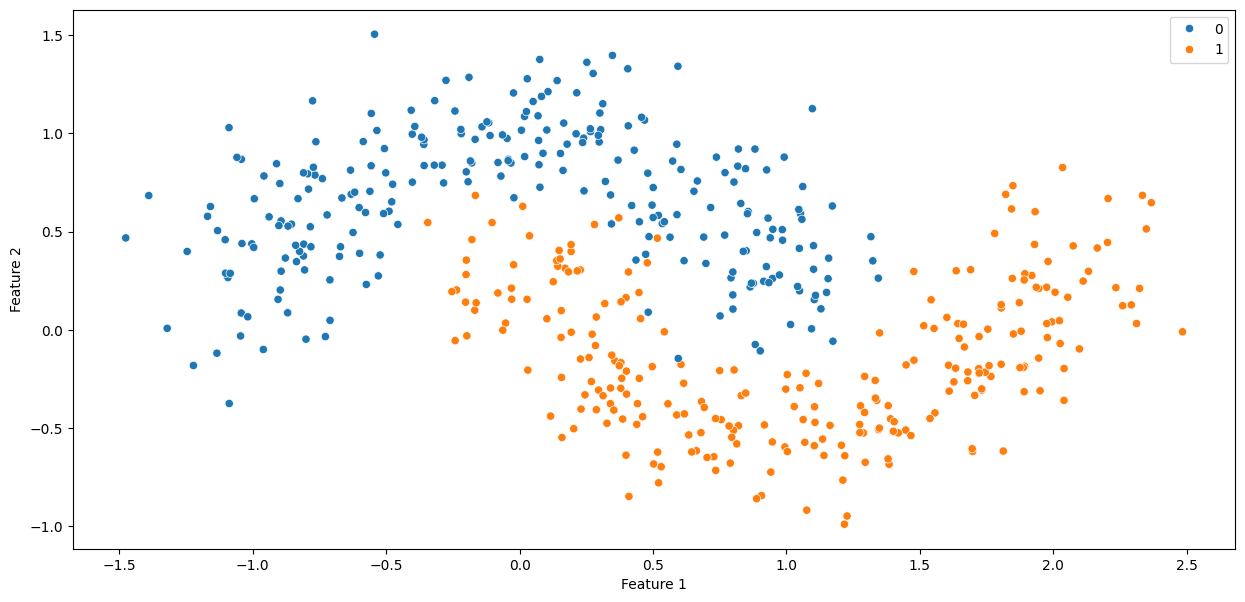

In [3]:
# Data Visualization
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### USING `Tanh/ReLU` ACTIVATION FUNCTION - ZERO INITIALIZATION

In [4]:
# Model Building
model = Sequential([
    Input(shape = (X_train.shape[1],)), # Basically has to provide number of features
    Dense(units = 2, activation='tanh'),
    Dense(units = 1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Model default weight - `Glorat Uniform`
model.get_weights()

[array([[ 0.36979008,  1.0010568 ],
        [-0.6762479 , -0.42556536]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.9396242],
        [-0.7816807]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
# Initializating all the weights to zero
initial_weights = model.get_weights()

for i in range(len(initial_weights)): # List of numpy arrays so iterating over the list
    initial_weights[i] *= 0

model.set_weights(initial_weights)
model.get_weights()

[array([[ 0.,  0.],
        [-0., -0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.],
        [-0.]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
# Model Training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=50, validation_split=0.2, verbose = 1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4725 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6935
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5125 - loss: 0.6930 - val_accuracy: 0.4500 - val

In [8]:
# Weights after training
model.get_weights()

[array([[ 0.,  0.],
        [-0., -0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.],
        [-0.]], dtype=float32),
 array([-0.04161339], dtype=float32)]

For tanh and ReLU activations, initializing all weights to zero results in all weights remaining zero and the neurons failing to activate or learn effectively.

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 25s 897us/step


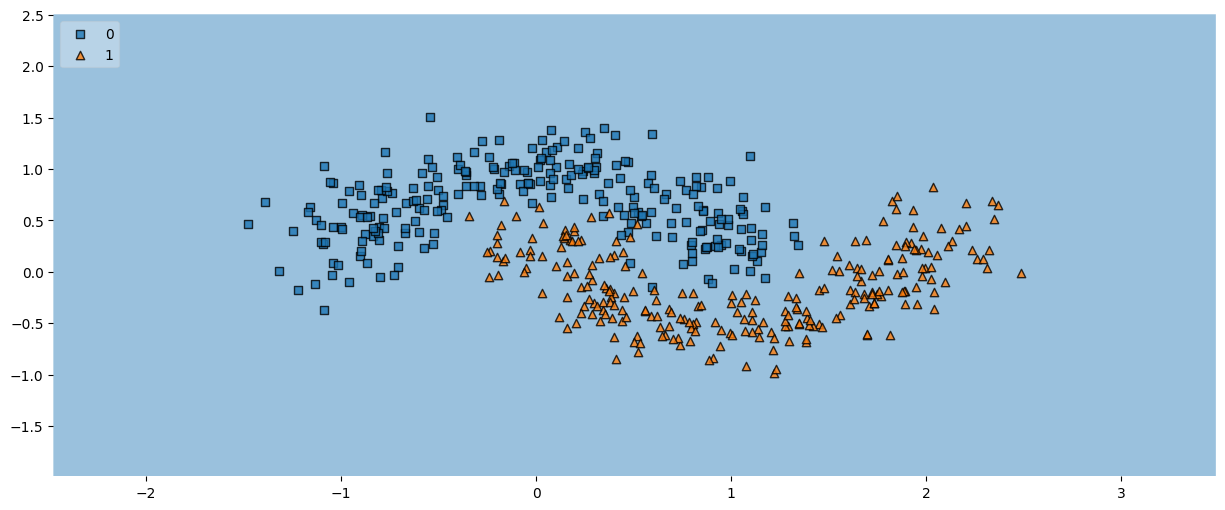

In [10]:
# Plotting decision regions
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (15, 6))
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.show()

### USING `SIGMOID` ACTIVATION FUNCTION

In [11]:
# Model Building
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 2, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Initializating all the weights to zero
initial_weights = model.get_weights()

for i in range(len(initial_weights)):
    initial_weights[i] *= 0

model.set_weights(initial_weights)
model.get_weights()

[array([[-0., -0.],
        [-0., -0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.],
        [-0.]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
# Weights after training
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=100, validation_split=0.2, verbose = 0)

model.get_weights()

[array([[-1.5249451, -1.5249451],
        [ 1.9047297,  1.9047297]], dtype=float32),
 array([-0.16238311, -0.16238311], dtype=float32),
 array([[-1.0006543],
        [-1.0006543]], dtype=float32),
 array([0.5402292], dtype=float32)]

In the case of sigmoid activation, although the weights will eventually be updated, the `initial zero initialization causes all neurons to behave identically`, just like a simple perceptron, which prevents the network from learning diverse features and only limited to linear classification

Weight evolution from input to first hidden layer – After back-propagation every weight tied to a given input converges to the same value.  
Weight evolution across hidden layers – Identical neuron outputs force the gradients to be uniform, so all weights in a layer remain equal throughout training.

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 19s 674us/step


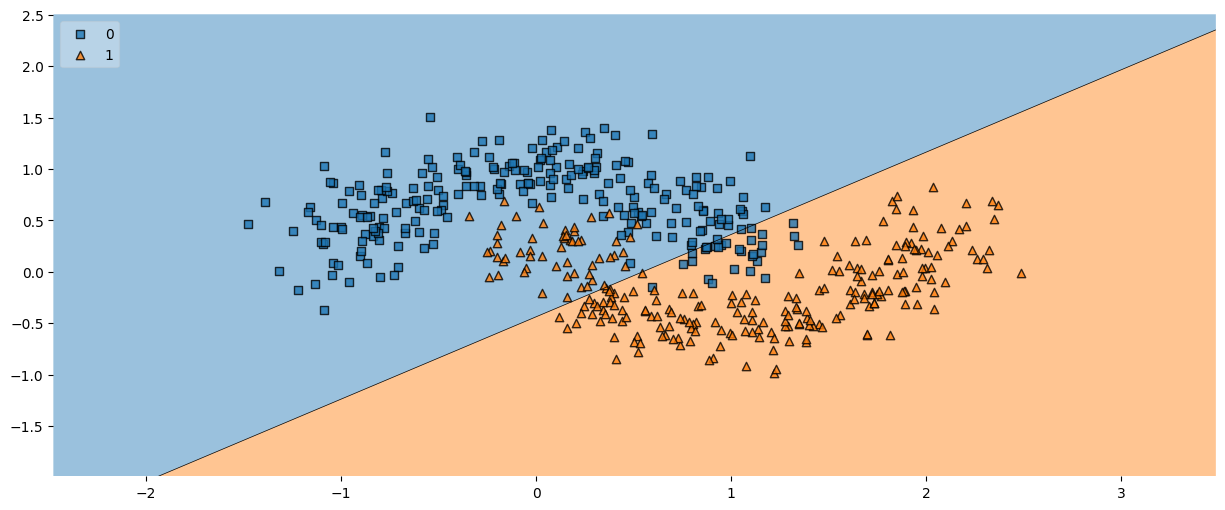

In [15]:
# Plotting decision regions
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

### USING `Tanh/ReLU` ACTIVATION FUNCTION - CONSTANT INITIALIZATION

In [16]:
# Model Building
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initialization all the weights to a constant value -0.5
initial_weights = model.get_weights()

for i in range(len(initial_weights)):
    initial_weights[i] = np.ones(initial_weights[i].shape) * 0.5

model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [19]:
# Weights after training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, validation_split=0.2, verbose = 0)

model.get_weights()

[array([[ 0.69219315,  0.69219315],
        [-0.7583335 , -0.7583335 ]], dtype=float32),
 array([-0.2277504, -0.2277504], dtype=float32),
 array([[1.0358704],
        [1.0358704]], dtype=float32),
 array([-0.06185934], dtype=float32)]

The weights will eventually be updated, the initial `constant initialization causes all neurons to behave identically irrespectice of action function`, just like a simple perceptron, which prevents the network from learning diverse features and only limited to linear classification

Weight evolution from input to first hidden layer – After back-propagation every weight tied to a given input converges to the same value.  
Weight evolution across hidden layers – Identical neuron outputs force the gradients to be uniform, so all weights in a layer remain equal throughout training.

The behavour is exactly same as sigmoid activation with zero initialization

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 19s 682us/step


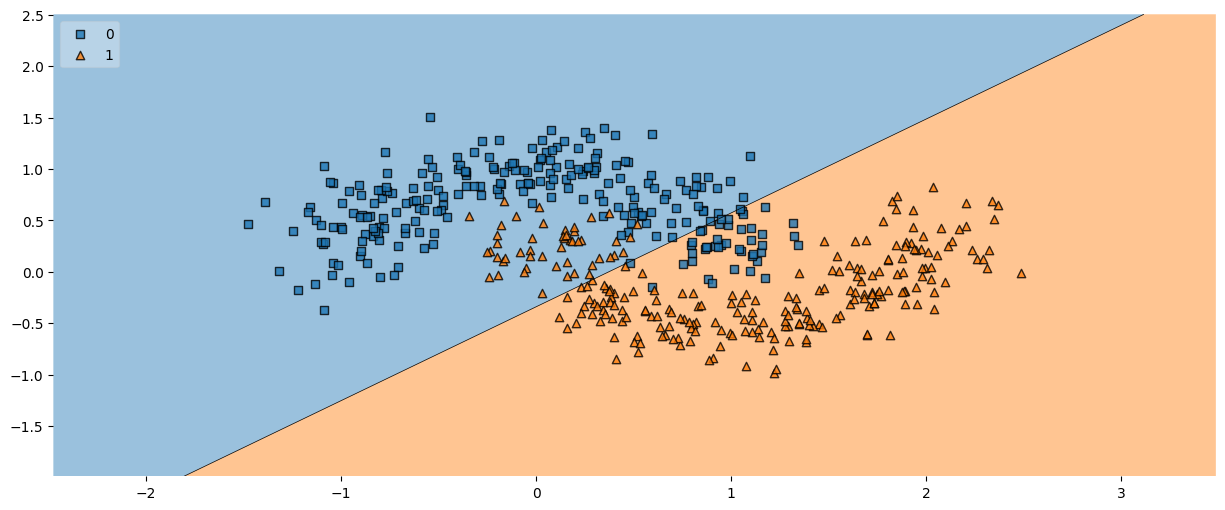

In [20]:
# Plotting decision regions
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

---

### Random Initialization
- **Large initial weights** can amplify gradients during back-propagation, leading to exploding gradients.
- **Small initial weights** can shrink gradients layer-by-layer, causing vanishing gradients.